# Performance Comparison between Support Vector Machine, Random Forest and Gaussian Naïve Bayes on German Credit and Breast Cancer datasets

<b> Notebook Contenst: </b>
- 1. Introduction.
        - Problem 1.
        - Problem 2.
        
        
- 2. Dataset Description.

        - Dataset (A) Description: 
            - Dataset (A) Exploratory Data Analysis.
            - Dataset (A) Features Selection. 
            - Dataset (A) Data Preprocessing.
            - Dataset (A) Models Development and Evaluation.
            
        - Dataset (B) Description:
            - Dataset (B) Exploratory Data Analysis.
            - Dataset (B) Features Selection. 
            - Dataset (B) Data Preprocessing.
            - Dataset (B) Models Development and Evaluation
            
- 3 References

- 4 Summary 

<b> Title </b>: Performance Comparison between Support Vector Machine, Random Forest and Gaussian Naïve Bayes on German Credit and Breast Cancer datasets.

<b> Name: </b> Muaad Siala

<b> Email </b> Muaad144301@gmail.com


# 1. Introduction 


<b> Problem 1: </b>  
The German Credit Data provides information on (20 features) & (1000 records). As well as a classification of whether an application is classified as good or bad credit risk (1 Target variable: "Risk"). The Bank manager should be able to use a predictive model built on this data to help him/her decide whether or not to approve a loan to a prospective applicant based on his or her profiles.

<b> Problem 2: </b>  
The breast Cancer dataset is contains  32 features and 570 records. As well as a classification of whether a cell is classified as M or B (1 Target variable: "diagnosis
"). The doctor should be able to use a predictive model built on this data to help him/her decide whether or not to approve a case of paient.



# • Importing libraries: 

In [ ]:
# Importing Libraries - T1 describe all libraries that used in this notebook
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # plotting
%matplotlib inline
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm # Support Vector Machines(SVM)
from sklearn import metrics
from sklearn.model_selection import cross_val_score # Importing cross validation function from sklearn
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn import metrics # Measuring accuracy on Testing Data
from sklearn.model_selection import cross_val_score # Importing cross validation function from sklearn
from pandas import read_csv
from sklearn import datasets 
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import svm
# Importing the model:
#from sklearn.ensemble import RandomForestClassifier


# 2. Datasets Descriptions 

# (A) German credit data description:

German credit dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix.


<b> Dataset Link: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data) </b>


<b> The above link provides two datasets: </b>
 
 - First dataset:  (German data) contain 20 categrocal features + 1 Target feature. (1000 x 21)
 - Second dataset:  (German Numerical Data) which is ready for Machine Learning. 



 In this project I used first data (German.data) dataset contins 21 columns (features) and 1000 records (rows): </b>

- <b> ex_balance </b>             ->  Status of existing checking account
- <b>dur_month  </b>            ->  Duration in month
- <b>cred_hist   </b>           ->  Credit history
- <b>purpose   </b>             ->  Purpose
- <b>cred_amont </b>            ->  Credit amount
- <b>save_bonds_acc  </b>       ->  Savings account/bonds
- <b>presnt_emply_since </b>   ->  Present employment since
- <b>install_rate_disp_incm </b>->  Installment rate in percentage of disposable income
- <b>perso_status_sex  </b>     ->  Personal status and sex
- <b>other_debtors    </b>      ->  Other debtors / guarantors
- <b>presn_residen_sinc </b>    ->  Present residence since
- <b>prop        </b>           ->  Property
- <b>age        </b>            ->  Age in years
- <b>othr_inst_pln  </b>        ->  Other installment plans
- <b>hous          </b>         ->  Housing
- <b>num_ext_cred_this_bnk </b> ->  Number of existing credits at this bank
- <b>job        </b>            ->  Job
- <b>num_liable   </b>          ->  Number of people being liable to provide maintenance for
- <b>tel        </b>            ->  Telephone
- <b>fore_wrk   </b>            ->  Foreign worker
- <b>Risk        </b>           ->  Cost Matrix ( Good or Bad )

In [ ]:
# Reading German Credit Dataset
GD =  pd.read_csv("german.data", sep=" ",header=None)
# Displing first 5 rows of dataset
GD.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
# Specifying the features of the dataset.
features=["ex_balance","dur_month","cred_hist",\
         "purpose","cred_amont","save_bonds_acc","presnt_emply_since",\
         "install_rate_disp_incm","perso_status_sex",\
         "other_debtors","presn_residen_sinc","property","age",\
        "othr_inst_pln","hous","num_ext_cred_this_bnk",\
        "job","num_liable","tel","fore_wrk","Risk"]

# Adding features to the dataset as first row 
GD.columns = features
GD

,ex_balance,dur_month,cred_hist,purpose,cred_amont,save_bonds_acc,presnt_emply_since,install_rate_disp_incm,perso_status_sex,other_debtors,...,property,age,othr_inst_pln,hous,num_ext_cred_this_bnk,job,num_liable,tel,fore_wrk,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [ ]:
# Dataset informations
GD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ex_balance              1000 non-null   object
 1   dur_month               1000 non-null   int64 
 2   cred_hist               1000 non-null   object
 3   purpose                 1000 non-null   object
 4   cred_amont              1000 non-null   int64 
 5   save_bonds_acc          1000 non-null   object
 6   presnt_emply_since      1000 non-null   object
 7   install_rate_disp_incm  1000 non-null   int64 
 8   perso_status_sex        1000 non-null   object
 9   other_debtors           1000 non-null   object
 10  presn_residen_sinc      1000 non-null   int64 
 11  property                1000 non-null   object
 12  age                     1000 non-null   int64 
 13  othr_inst_pln           1000 non-null   object
 14  hous                    1000 non-null   object
 15  num_e

In [ ]:
# Statistics summary of the dataset
GD.describe(include='all')

,ex_balance,dur_month,cred_hist,purpose,cred_amont,save_bonds_acc,presnt_emply_since,install_rate_disp_incm,perso_status_sex,other_debtors,...,property,age,othr_inst_pln,hous,num_ext_cred_this_bnk,job,num_liable,tel,fore_wrk,Risk
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,...,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,...,4,NaN,3,3,NaN,4,NaN,2,2,NaN
top,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,A101,...,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201,NaN
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,...,332,NaN,814,713,NaN,630,NaN,596,963,NaN
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,...,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,1.300000
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,...,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,0.458487
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,...,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,...,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,...,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,2.000000


In [ ]:
# If the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
GD.nunique()

ex_balance                  4
dur_month                  33
cred_hist                   5
purpose                    10
cred_amont                921
save_bonds_acc              5
presnt_emply_since          5
install_rate_disp_incm      4
perso_status_sex            4
other_debtors               3
presn_residen_sinc          4
property                    4
age                        53
othr_inst_pln               3
hous                        3
num_ext_cred_this_bnk       4
job                         4
num_liable                  2
tel                         2
fore_wrk                    2
Risk                        2
dtype: int64

In [ ]:
# Shape of the dataset
print(GD.shape)
# The target class distribution
target = GD.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

(1000, 21)
Class=1, Count=700, Percentage=70.000%
Class=2, Count=300, Percentage=30.000%


# A.1 German Credit Data - Exploratory Data Analysis (EDA)

In [ ]:
# Function to plot a bar chart for german credit data features 
def Plot_Bar_Chart(dataset, features_to_plot):
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(features_to_plot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(features_to_plot))

    for colName, plotNumber in zip(features_to_plot, range(len(features_to_plot))):
        dataset.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

# A.1.1 Distribution of the numerical features

- <b> A.1.1.1 Age distribution. </b>

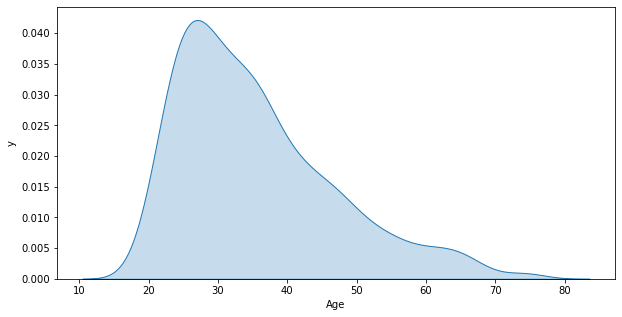

In [ ]:
# Age 
plt.figure(figsize=(10,5))
#plt.xlim(0,2000)
plt.xlabel('Age')
plt.ylabel('y') # Clear the y axis
sns.kdeplot(GD['age'],shade=True)
plt.show()

- <b> A.1.1.2 Duration in month distribution</b>

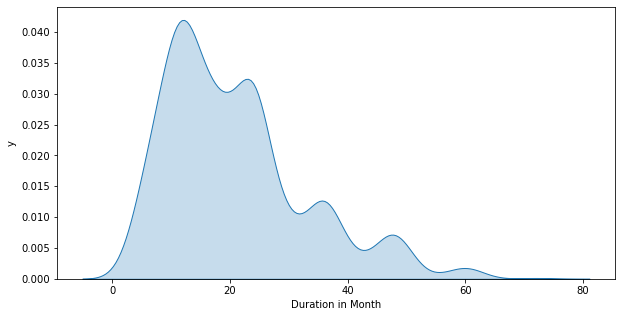

In [ ]:
# Duration in month  
plt.figure(figsize=(10,5))
#plt.xlim(0,2000)
plt.xlabel('Duration in Month')
plt.ylabel('y') # Clear the y axis
sns.kdeplot(GD['dur_month'],shade=True)
plt.show()

- <b> A.1.1.3 Credit Amount distribution. </b>

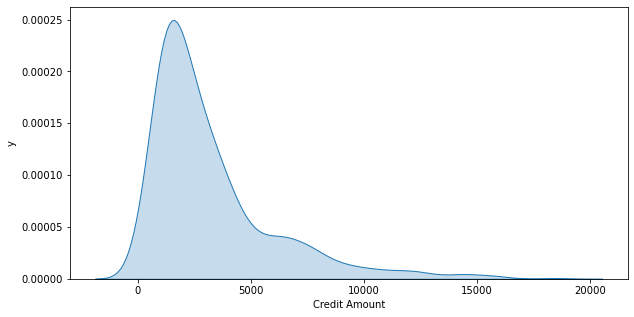

In [ ]:
# Credit Amount - 
plt.figure(figsize=(10,5))
#plt.xlim(0,2000)
plt.xlabel('Credit Amount')
plt.ylabel('y') # Clear the y axis
sns.kdeplot(GD['cred_amont'],shade=True)
plt.show()

# A.1.2 Distribution of the categorical features

 <b> A.1.2.1 Distribution of the target variable (Risk) </b>


- (Cost Matrix):  the following are the possible values of the <b> Risk </b>:
        Good = 2 which is the state where the loan is a good decision 
        Bad  = 1 which is the state where the loan is a bad decision 
        
        

<AxesSubplot:xlabel='Risk'>

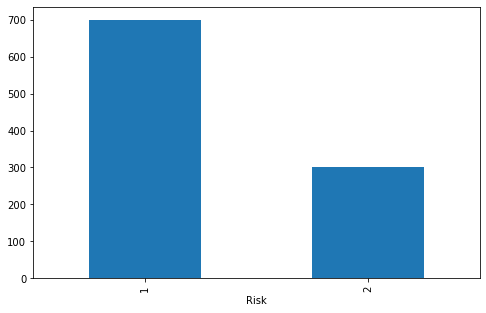

In [ ]:
# Bar chart for the target variable 
GroupedData=GD.groupby('Risk').size()
GroupedData.plot(kind='bar', figsize=(8,5))

<b> A.1.2.2 This cell for the count distribution of possible values for the following features:</b>
     
- (Status of existing checking account):  the following are the possible values of the <b> ex_balance </b>:
          A11 :      ... <    0 DM
	      A12 : 0 <= ... <  200 DM
	      A13 :      ... >= 200 DM /salary assignments for at least 1 year
          A14 : no checking account



- (Credit history): the following are the possibles value of the <b> cred_hist </b>:  
	      A30 : no credits taken/		    all credits paid back duly
          A31 : all credits at this bank paid back duly
	      A32 : existing credits paid back duly till now
          A33 : delay in paying off in the past
	      A34 : critical account/  other credits existing (not at this bank)


- (Purpose): the following are the possibles value of the <b> prop </b>:  
          A40 : car (new)
	      A41 : car (used)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exist?)
	      A48 : retraining
	      A49 : business
	      A410 : others
    
- (Savings account/bonds): the following are the possibles value of the <b> save_bonds_acc </b>:  
          A61 :          ... <  100 DM
          A62 :   100 <= ... <  500 DM
          A63 :   500 <= ... < 1000 DM
          A64 :          .. >= 1000 DM
          A65 :   unknown/ no savings account
    
   <b> Note:</b> In the same sequnce please, read the bars below from <b>Left</b> to <b> Right </b> 


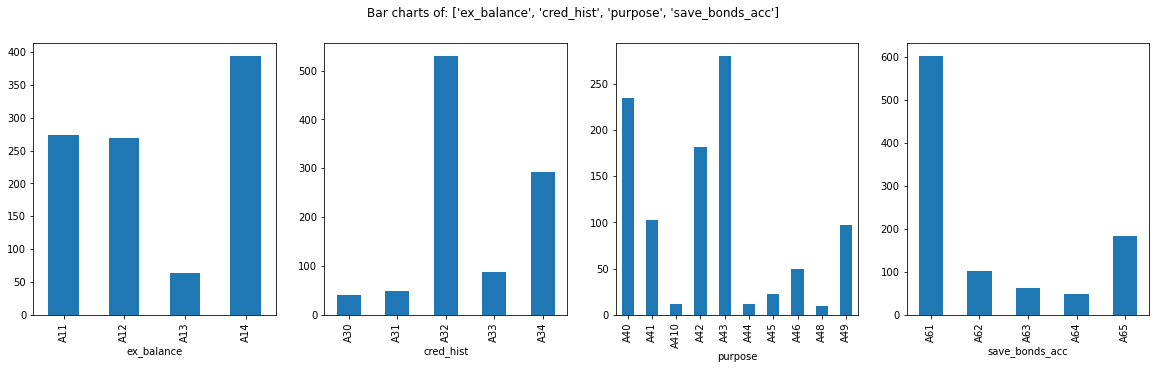

In [ ]:
Plot_Bar_Chart(dataset=GD,  features_to_plot=["ex_balance","cred_hist","purpose","save_bonds_acc",])

<b> A.1.2.3 This cell for the count distribution of possible values for the following features</b>



- (Present employment since): the following are the possibles value of the <b> presnt_emply_since </b>:  
                A71 : unemployed
                A72 :       ... < 1 year
                A73 : 1  <= ... < 4 years  
                A74 : 4  <= ... < 7 years
                A75 :       .. >= 7 years



- (Installment rate in percentage of disposable income): the following are the possibles value of the <b> install_rate_disp_incm </b>:  
                Numerical



- (Personal status and sex): the following are the possibles value of the <b> perso_status_sex </b>: 
                A91 : male   : divorced/separated
                A92 : female : divorced/separated/married
                A93 : male   : single
                A94 : male   : married/widowed
                A95 : female : single

   

- (Other debtors / guarantors): the following are the possibles value of the <b> other_debtors </b>: 
                A101 : none
                A102 : co-applicant
                A103 : guarantor

    
    
    
   <b> Note:</b> In the same sequnce please, read the bars below from <b>Left</b> to <b> Right </b> 


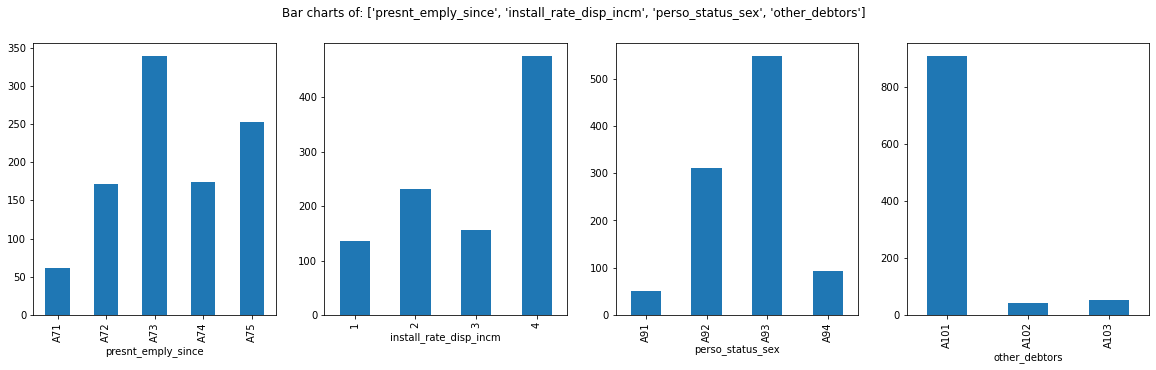

In [ ]:
Plot_Bar_Chart(dataset=GD,  features_to_plot=["presnt_emply_since","install_rate_disp_incm","perso_status_sex","other_debtors",])

<b> A.1.2.4 This cell for the count distribution of possible values for the following features</b>
     



- (Present residence since):  the following are the possible values of the <b> presn_residen_sinc </b>:
                Numerical


- (Property): the following are the possibles value of the <b> property </b>:  
                A121 : real estate
                A122 : if not A121 : building society savings agreement/life insurance
                A123 : if not A121/A122 : car or other, not in attribute 6
                A124 : unknown / no property



- (Other installment plans): the following are the possibles value of the <b> othr_inst_pln </b>: 
               A141 : bank
               A142 : stores
	           A143 : none

   

- (Housing): the following are the possibles value of the <b> hous </b>: 
               A151 : rent
               A152 : own
               A153 : for free

    
   <b> Note:</b> In the same sequnce please, read the bars below from <b>Left</b> to <b> Right </b> 


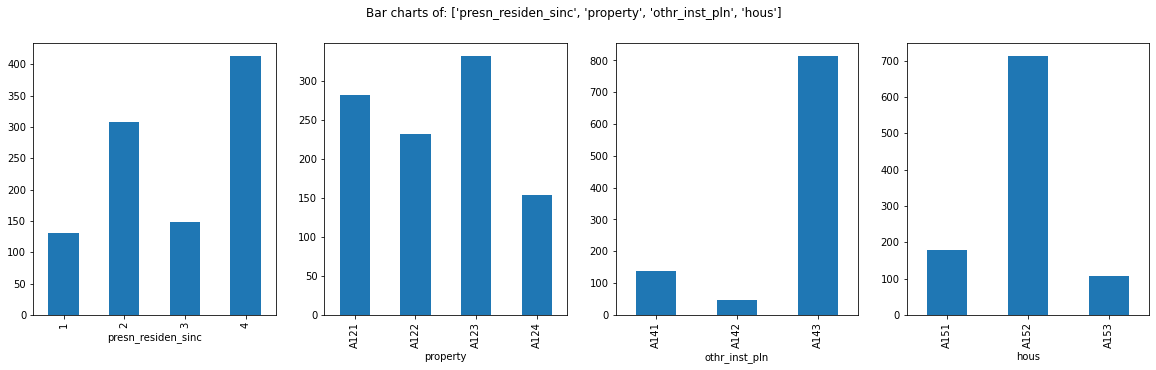

In [ ]:
Plot_Bar_Chart(dataset=GD,  features_to_plot=["presn_residen_sinc","property","othr_inst_pln","hous",])

<b> A.1.2.5 This cell for the count distribution of possible values for the following features</b>



- <b>(Number of existing credits at this bank):</b> the following are the possible value of the <b> num_ext_cred_this_bnk   </b>: 
              Numerical 



- <b>(Job):</b> the following are the possibles value of the <b> job </b>:  
              A171 : unemployed/ unskilled  - non-resident
              A172 : unskilled - resident
              A173 : skilled employee / official
              A174 : management/ self-employed/highly qualified employee/ officer


- <b>(Number of people being liable to provide maintenance for):</b> the following are the possible value of the <b> num_liable              </b>: 
              Numerical
   

- <b>(Foreign worker):</b> the following are the possibles value of the <b> fore_wrk </b>: 
             A201 : yes
             A202 : no

    
    
    
   <b> Note:</b> In the same sequnce please, read the bars below from <b>Left</b> to <b> Right </b> 


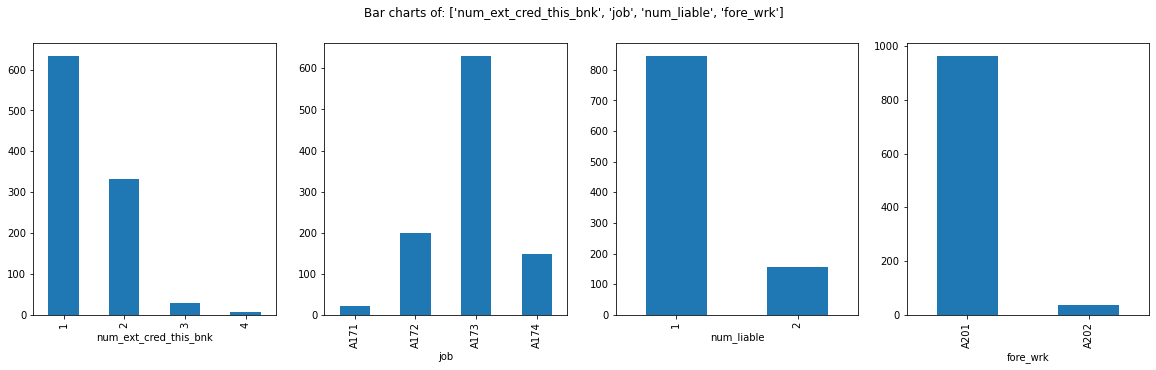

In [ ]:
Plot_Bar_Chart(dataset=GD,  features_to_plot=["num_ext_cred_this_bnk","job","num_liable","fore_wrk",])

# A.2 Features selection for German Credit dataset

In this section, I will do two steps to select appropriate features, by finding the correlation between the variables according to the p-value. 

<b> Step one: </b>
I'm trying to find the correlation between the two variables. The first variable is categorical (Risk) and the second variable is numerical continuous variables. 
(Age, Duration in month, and Credit amount) VS (Risk)

To do so, I will use ANOVA test to calculate the p-value and find the correlation between the above variables.  and exploring the relationship in the box plot.


<b> Step two: </b>
I'm trying to find the correlation between the categorical variables. The first variable is categorical (Risk) and the second variable is also a categorical variable. 
(Existing Balance, Credit history, Purpose, Savings account/bonds, Present employment since, Installment rate in percentage of disposable income, Personal status and sex, Other debtors/guarantors, Present residence since, Property, Other instalment plans, Housing, Number of existing credits at this bank, Job, Number of people being liable to provide maintenance for, Telephone, foreign worker)   VS (Risk) 

To do so, I will use the Chi-square test to calculate the p-value and find the correlation between the above variables.  and exploring the relationship in the box plot.

<b> A.2.1 Step (1) ANOVA Test  & Box plot:

####################################### ANOVA Results ################################################# 

age is correlated with Risk | P-Value: 0.003925339398278295
cred_amont is correlated with Risk | P-Value: 8.797572373533373e-07
dur_month is correlated with Risk | P-Value: 6.488049877187189e-12


########################################## Box plot ################################################# 



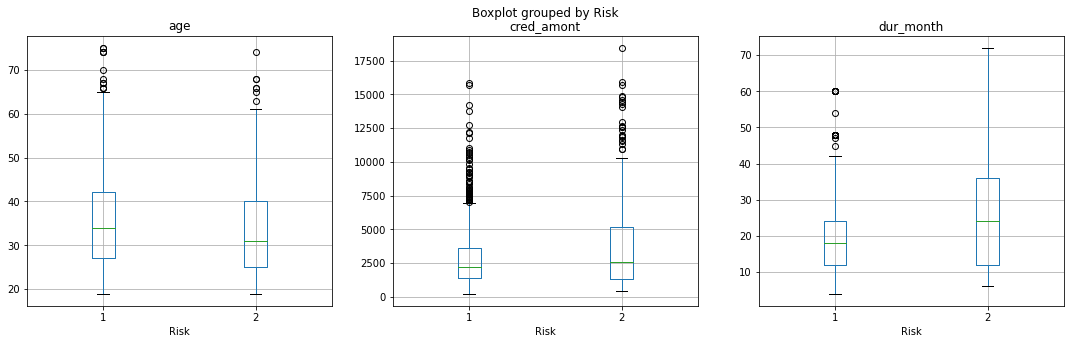

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(dataset, Risk, numerical_features):
   
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('####################################### ANOVA Results ################################################# \n')
    for predictor in numerical_features:
        CategoryGroupLists=dataset.groupby(Risk)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', Risk, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', Risk, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

# Calling the function to check which categorical variables are correlated with target
numerical_featuresss=['age', 'cred_amont','dur_month']
FunctionAnova(dataset=GD, Risk='Risk', numerical_features=numerical_featuresss)

# Box plots for Categorical Target Variable "GoodCredit" and continuous predictors
ContinuousColsList=['age','cred_amont', 'dur_month']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

print('\n')
print('########################################## Box plot ################################################# \n')
 
# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    GD.boxplot(column=PredictorCol, by='Risk', figsize=(5,5), vert=True, ax=PlotCanvas[i])

<b> A.2.2 Step (2) Chi-square test </b>

In [ ]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(dataset, Risk, categorical_features):
    
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in categorical_features:
        CrossTabResult=pd.crosstab(index=dataset[Risk], columns=dataset[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', Risk, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', Risk, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [ ]:
categorical_featuresss=['ex_balance', 'cred_hist', 'purpose','save_bonds_acc','presnt_emply_since',
                     'install_rate_disp_incm', 'perso_status_sex', 'other_debtors','presn_residen_sinc', 'property',
                     'othr_inst_pln', 'hous', 'num_ext_cred_this_bnk', 'job', 'num_liable', 'tel', 'fore_wrk']

# Calling the function
FunctionChisq(dataset=GD, Risk='Risk',categorical_features= categorical_featuresss)

ex_balance is correlated with Risk | P-Value: 1.2189020722893755e-26
cred_hist is correlated with Risk | P-Value: 1.2791872956751013e-12
purpose is correlated with Risk | P-Value: 0.00011574910079691586
save_bonds_acc is correlated with Risk | P-Value: 2.7612142385682596e-07
presnt_emply_since is correlated with Risk | P-Value: 0.001045452349140254
install_rate_disp_incm is NOT correlated with Risk | P-Value: 0.1400333122128481
perso_status_sex is correlated with Risk | P-Value: 0.02223800546926877
other_debtors is correlated with Risk | P-Value: 0.036055954027247226
presn_residen_sinc is NOT correlated with Risk | P-Value: 0.8615521320413175
property is correlated with Risk | P-Value: 2.8584415733250017e-05
othr_inst_pln is correlated with Risk | P-Value: 0.0016293178186473534
hous is correlated with Risk | P-Value: 0.00011167465374597684
num_ext_cred_this_bnk is NOT correlated with Risk | P-Value: 0.4451440800083001
job is NOT correlated with Risk | P-Value: 0.5965815918843431
num_li

['ex_balance',
 'cred_hist',
 'purpose',
 'save_bonds_acc',
 'presnt_emply_since',
 'perso_status_sex',
 'other_debtors',
 'property',
 'othr_inst_pln',
 'hous',
 'fore_wrk']

<b> A.2.3 Additional exploration by correlation matrix </b>


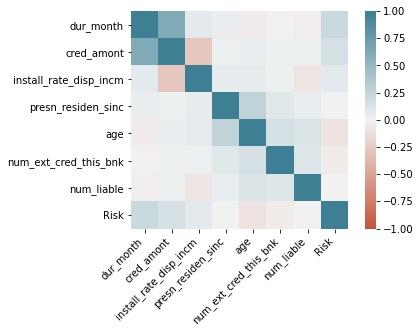

In [ ]:
# Correlation Matrix
corr = GD.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=1000),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Since machine learning deals with correlated variables (features) to the target class, then,the correlated (features) variables that I selected to use for model predication are the following: 
- Status of existing checking account
- Credit history
- Purpose
- Credit amount
- Savings account/bonds
- Present employment since
- Personal status and sex
- Other debtors / guarantors
- Property
- Other installment plans
- Housing
- Foreign worker


# A. 3 Data pre-processing for German Credit dataset

In [ ]:
Selected_Features =['ex_balance',
 'cred_hist',
 'purpose',
 'save_bonds_acc',
 'presnt_emply_since',
 'perso_status_sex',
 'other_debtors',
 'property',
 'othr_inst_pln',
 'hous',
 'fore_wrk']

# Selecting final features for ML model 
GD_for_ML_GCD=GD[Selected_Features]
GD_for_ML_GCD.head()

,ex_balance,cred_hist,purpose,save_bonds_acc,presnt_emply_since,perso_status_sex,other_debtors,property,othr_inst_pln,hous,fore_wrk
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A201
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A201
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A201


In [ ]:
# Saving this final data for reference during deployment
GD_for_ML_GCD.to_pickle('GD_for_ML_GCD.pkl')

In [ ]:
# Treating the Ordinal variable first
GD_for_ML_GCD['presnt_emply_since'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)

C:\Users\44784\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [ ]:
# Treating the binary nominal variable
GD_for_ML_GCD['fore_wrk'].replace({'A201':1, 'A202':0}, inplace=True)

# Looking at data after nominal treatment
GD_for_ML_GCD.head()

,ex_balance,cred_hist,purpose,save_bonds_acc,presnt_emply_since,perso_status_sex,other_debtors,property,othr_inst_pln,hous,fore_wrk
0,A11,A34,A43,A65,5,A93,A101,A121,A143,A152,1
1,A12,A32,A43,A61,3,A92,A101,A121,A143,A152,1
2,A14,A34,A46,A61,4,A93,A101,A121,A143,A152,1
3,A11,A32,A42,A61,4,A93,A103,A122,A143,A153,1
4,A11,A33,A40,A61,3,A93,A101,A124,A143,A153,1


In [ ]:
# Treating all the nominal variables at once using dummy variables
GD_for_ML_Num_GCD = pd.get_dummies(GD_for_ML_GCD)

# Adding Target Variable to the data
GD_for_ML_Num_GCD['Risk']=GD['Risk']

# Printing sample rows
GD_for_ML_Num_GCD.head()

,presnt_emply_since,fore_wrk,ex_balance_A11,ex_balance_A12,ex_balance_A13,ex_balance_A14,cred_hist_A30,cred_hist_A31,cred_hist_A32,cred_hist_A33,...,property_A122,property_A123,property_A124,othr_inst_pln_A141,othr_inst_pln_A142,othr_inst_pln_A143,hous_A151,hous_A152,hous_A153,Risk
0,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,3,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,2
2,4,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,4,1,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,1
4,3,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,2


In [ ]:
GD_for_ML_Num_GCD.columns

Index(['presnt_emply_since', 'fore_wrk', 'ex_balance_A11', 'ex_balance_A12',
       'ex_balance_A13', 'ex_balance_A14', 'cred_hist_A30', 'cred_hist_A31',
       'cred_hist_A32', 'cred_hist_A33', 'cred_hist_A34', 'purpose_A40',
       'purpose_A41', 'purpose_A410', 'purpose_A42', 'purpose_A43',
       'purpose_A44', 'purpose_A45', 'purpose_A46', 'purpose_A48',
       'purpose_A49', 'save_bonds_acc_A61', 'save_bonds_acc_A62',
       'save_bonds_acc_A63', 'save_bonds_acc_A64', 'save_bonds_acc_A65',
       'perso_status_sex_A91', 'perso_status_sex_A92', 'perso_status_sex_A93',
       'perso_status_sex_A94', 'other_debtors_A101', 'other_debtors_A102',
       'other_debtors_A103', 'property_A121', 'property_A122', 'property_A123',
       'property_A124', 'othr_inst_pln_A141', 'othr_inst_pln_A142',
       'othr_inst_pln_A143', 'hous_A151', 'hous_A152', 'hous_A153', 'Risk'],
      dtype='object')

In [ ]:
# Separate Target Variable and Predictor Variables

#  'age','cred_amont','dur_month', 

Risk='Risk'
Predictors=['presnt_emply_since', 'fore_wrk',
       'ex_balance_A11', 'ex_balance_A12','ex_balance_A13', 'ex_balance_A14',
        'cred_hist_A30', 'cred_hist_A31',
       'cred_hist_A32', 'cred_hist_A33', 'cred_hist_A34', 'purpose_A40',
       'purpose_A41', 'purpose_A410', 'purpose_A42', 'purpose_A43',
       'purpose_A44', 'purpose_A45', 'purpose_A46', 'purpose_A48',
       'purpose_A49', 'save_bonds_acc_A61', 'save_bonds_acc_A62',
       'save_bonds_acc_A63', 'save_bonds_acc_A64', 'save_bonds_acc_A65',
       'perso_status_sex_A91', 'perso_status_sex_A92', 'perso_status_sex_A93',
       'perso_status_sex_A94', 'other_debtors_A101', 'other_debtors_A102',
       'other_debtors_A103', 'property_A121', 'property_A122', 'property_A123',
       'property_A124', 'othr_inst_pln_A141', 'othr_inst_pln_A142',
       'othr_inst_pln_A143', 'hous_A151', 'hous_A152', 'hous_A153']

X=GD_for_ML_Num_GCD[Predictors].values
y=GD_for_ML_Num_GCD[Risk].values

# Change 
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [ ]:
# On this data Min Max Normalization produced better results
PredictorScaler=MinMaxScaler()
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 43)
(700,)
(300, 43)
(300,)


# Now 
Dataset (A) ready to feed into SVM & Random Forest Models. Use -<b> X_train, X_test, y_train, y_test </b> To train the models !

# A.4 Models development & Evaluation for German Credit Data

<b> Naive Bayes Model - GCD

In [ ]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

           1       0.84      0.70      0.76       209
           2       0.50      0.70      0.59        91

    accuracy                           0.70       300
   macro avg       0.67      0.70      0.68       300
weighted avg       0.74      0.70      0.71       300

[[146  63]
 [ 27  64]]
Accuracy of the model on Testing Sample Data: 0.71

Accuracy values for 10-fold Cross Validation:
 [0.68018586 0.4911859  0.7        0.72798574 0.74741533 0.72010045
 0.63252747 0.74430147 0.74599729 0.72798574]

Final Average Accuracy of the model: 0.69


<b> SVM Model -GCD </b> 

In [ ]:
clf = svm.SVC(C=2, kernel='rbf', gamma=0.1) # Using Radial-basis function
# Printing all the parameters of SVM
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

SVC(C=2, gamma=0.1)
              precision    recall  f1-score   support

           1       0.78      0.88      0.83       209
           2       0.62      0.44      0.51        91

    accuracy                           0.75       300
   macro avg       0.70      0.66      0.67       300
weighted avg       0.73      0.75      0.73       300

[[184  25]
 [ 51  40]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.74796273 0.73944295 0.75159817 0.70133333 0.76351097 0.73104474
 0.68503119 0.75665219 0.76533333 0.70541038]

Final Average Accuracy of the model: 0.73


<b> Random forest - GCD

RandomForestClassifier(max_depth=10)
              precision    recall  f1-score   support

           1       0.76      0.89      0.81       209
           2       0.56      0.34      0.42        91

    accuracy                           0.72       300
   macro avg       0.66      0.61      0.62       300
weighted avg       0.70      0.72      0.70       300

[[185  24]
 [ 60  31]]
Accuracy of the model on Testing Sample Data: 0.7

Accuracy values for 10-fold Cross Validation:
 [0.72224231 0.71776316 0.71433083 0.68       0.77229833 0.69124574
 0.69605263 0.71776316 0.71225296 0.72238245]

Final Average Accuracy of the model: 0.71


<AxesSubplot:>

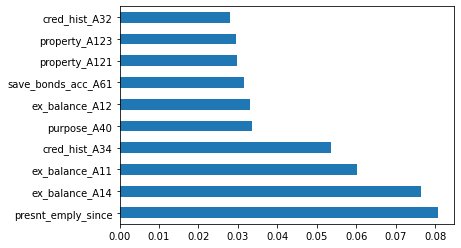

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestClassifier(max_depth=10, n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# (B) Breast cancer data - Description


The breast cancer dataset is a classic binary classification dataset that is simple to use. If True, instead of a Bunch object, returns (data, target). 


<b> Dataset from lab 4 Link: https://surreylearn.surrey.ac.uk/d2l/le/lessons/209089/topics/2080857 </b>



 In this task I used berast cancer dataset contins 32 columns (features) and 570 records (rows): </b>

- <b> id </b>            
- <b>diagnosis  </b>           
- <b>radius_mean   </b>          
- <b>texture_mean   </b>   
- <b>perimeter_mean </b>      
- <b>area_mean  </b>     
- <b>smoothness_mean </b>
- <b>compactness_mean </b>
- <b>concavity_mean  </b>   
- <b>concave points_mean    </b>      
- <b>symmetry_mean </b>    
- <b>fractal_dimension_mean        </b>          
- <b>radius_se        </b>          
- <b>texture_se  </b>       
- <b>perimeter_se          </b>  
- <b>area_se </b> 
- <b>smoothness_se        </b>          
- <b>compactness_se   </b>          
- <b>concavity_se        </b>   
- <b>concave points_se   </b>    
- <b>symmetry_se        </b>         
- <b>fractal_dimension_se </b> 
- <b>radius_worst        </b>      
- <b>texture_worst   </b>       
- <b>perimeter_worst        </b>          
- <b>area_worst   </b>            
- <b>smoothness_worst        </b>     
- <b>compactness_worst </b> 
- <b>concavity_worst        </b>       
- <b>concave points_worst   </b>   
- <b>symmetry_worst        </b>        
- <b>fractal_dimension_worst   </b>          

In [ ]:
# Reading breast dataset from my local storage
BC_v = pd.read_csv('C:/Users/44784/Desktop/Machine learning and Data Mining/Code/Muaad-6664948-LSA-COMM055/breast_cancer_data_v.csv')


#'C:/Users/44784/Desktop/Machine learning and Data Mining/Code/Muaad-6664948-LSA-COMM055/breast_cancer_data.csv'

# B.1 Breast Cancer Data - Exploratory Data Analysis (EDA)

In [ ]:
# Overall view of the data:
BC_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Checking the first few rows:
BC_v.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Statistics summary of the dataset
BC_v.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [ ]:
# If the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
BC_v.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [ ]:
BC_v.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

<AxesSubplot:xlabel='diagnosis'>

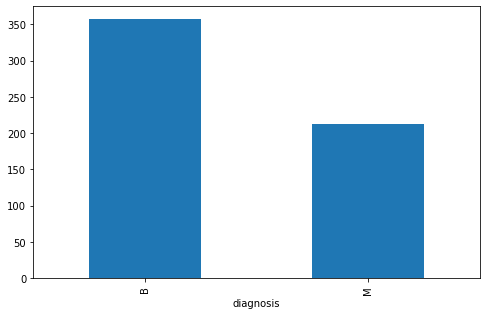

In [ ]:
# Bar chart for the target variable 
GroupedData=BC_v.groupby('diagnosis').size()
GroupedData.plot(kind='bar', figsize=(8,5))

In [ ]:
Plot_Bar_Chart(dataset=BC_v,  features_to_plot=["area_worst",])

NameError: name 'Plot_Bar_Chart' is not defined

# B.2 Features Selection for Breast Cancer dataset.

<b> B.2.1 ANOVA test used when the relationship is between a categorical features and  a continuous features 

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(dataset, Risk, numerical_features):
   
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('####################################### ANOVA Results ################################################# \n')
    for predictor in numerical_features:
        CategoryGroupLists=dataset.groupby(Risk)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', Risk, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', Risk, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

# Calling the function to check which categorical variables are correlated with target
numerical_featuresss=[  'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
FunctionAnova(dataset=BC_v, Risk='diagnosis', numerical_features=numerical_featuresss)

# Box plots for Categorical Target Variable "GoodCredit" and continuous predictors
ContinuousColsList=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

#fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

#print('\n')
#print('########################################## Box plot ################################################# \n')
 
# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
#for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
 #   BC.boxplot(column=PredictorCol, by='diagnosis', figsize=(5,5), vert=True, ax=PlotCanvas[i])

####################################### ANOVA Results ################################################# 

radius_mean is correlated with diagnosis | P-Value: 8.465940572263339e-96
texture_mean is correlated with diagnosis | P-Value: 4.0586360478986136e-25
perimeter_mean is correlated with diagnosis | P-Value: 8.43625103617395e-101
area_mean is correlated with diagnosis | P-Value: 4.734564310307994e-88
smoothness_mean is correlated with diagnosis | P-Value: 1.0518503592033238e-18
compactness_mean is correlated with diagnosis | P-Value: 3.938263105887557e-56
concavity_mean is correlated with diagnosis | P-Value: 9.966555755074321e-84
concave points_mean is correlated with diagnosis | P-Value: 7.101150161059557e-116
symmetry_mean is correlated with diagnosis | P-Value: 5.73338402846732e-16
fractal_dimension_mean is NOT correlated with diagnosis | P-Value: 0.7599368037255626
radius_se is correlated with diagnosis | P-Value: 9.738948656462521e-50
texture_se is NOT correlated with diagnosis 

<b> B.2.2 Additional exploration by correlation matrix </b> 

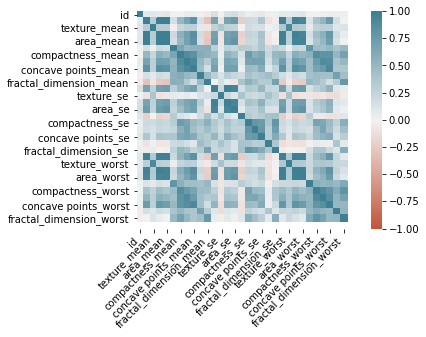

In [ ]:
# Correlation Matrix
corr = BC_v.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=1000),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Since machine learning deals with correlated variables (features) to the target class, then,the correlated (features) variables that I selected to use for model predication are the following: 


1. radius_mean 
2. texture_mean 
3. perimeter_mean 
4. area_mean 
5. smoothness_mean 
6. compactness_mean 
7. concavity_mean 
8. concave points_mean
9. symmetry_mean
10. radius_se 
11. perimeter_se 
12. area_se 
13. compactness_se 
14. concavity_se 
15. concave points_se
16. radius_worst
17. texture_worst
18. perimeter_worst
19. area_worst
20. smoothness_worst 
21. compactness_worst 
22. concavity_worst 
23. concave points_worst
24. symmetry_worst 
25. fractal_dimension_worst 

# B.3 Data pre-processing fro Breast Cancer Dataset.

In [ ]:
Selected_Features =['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean',
       'radius_se', 'perimeter_se', 'area_se',
       'compactness_se', 'concavity_se', 'concave points_se'
       , 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# Selecting final features for ML model 
BC_for_ML=BC_v[Selected_Features]
BC_for_ML.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Saving this final data for reference during deployment
BC_for_ML.to_pickle('BC_for_ML.pkl') # Looking for help ya allah 

In [ ]:
BC_for_ML.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
BC_for_ML['diagnosis']=BC_v['diagnosis']

<ipython-input-86-3cbc9a0fafd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BC_for_ML['diagnosis']=BC_v['diagnosis']


In [ ]:
# Separate Target Variable (diagnosis) and Predictor Variables (25 features)
 

Risk='diagnosis'
Predictors=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

X_for_BC=BC_for_ML[Predictors].values
y_for_BC=BC_for_ML[Risk].values

# Split the data into training and testing set
X_train_for_BC, X_test_for_BC, y_train_for_BC, y_test_for_BC = train_test_split(X_for_BC, y_for_BC, test_size=0.3, random_state=428)

In [ ]:
# On this data Min Max Normalization produced better results
PredictorScaler=MinMaxScaler()
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X_for_BC)
# Generating the standardized values of X
X_BC=PredictorScalerFit.transform(X_for_BC)
# Split the data into training and testing set
X_train_for_BC_nor, X_test_for_BC_nor, y_train_for_BC_nor, y_test_for_BC_nor = train_test_split(X_BC, y_for_BC, test_size=0.3, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(X_train_for_BC_nor.shape)
print(y_train_for_BC_nor.shape)
print(X_test_for_BC_nor.shape)
print(y_test_for_BC_nor.shape)

(398, 25)
(398,)
(171, 25)
(171,)


# Now 
Dataset (B) ready to feed into SVM & Random Forest Models.

To train the models I will use the following sets:
- X_train_for_BC_nor
- X_test_for_BC_nor
- y_train_for_BC_nor
- y_test_for_BC_nor </b> 

# B.4 Models development & Evaluation for Breast Cancer Dataset

<b> Naive Bayes model - BCD

In [ ]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train_for_BC_nor,y_train_for_BC_nor)
prediction=NB.predict(X_test_for_BC_nor)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test_for_BC_nor, prediction))
print(metrics.confusion_matrix(y_test_for_BC_nor, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test_for_BC_nor, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X_BC , y_for_BC, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

           B       0.94      0.95      0.95       108
           M       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

[[103   5]
 [  6  57]]
Accuracy of the model on Testing Sample Data: 0.94

Accuracy values for 10-fold Cross Validation:
 [0.93031812 0.8776676  0.89196676 0.92901849 0.92982456 0.98236235
 0.92901849 0.96491228 0.89621753 0.94615252]

Final Average Accuracy of the model: 0.93


<b> SVM Model - BCD </b>

In [ ]:
clf = svm.SVC(C=2, kernel='rbf', gamma=0.1)
# Printing all the parameters of SVM
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train_for_BC_nor,y_train_for_BC_nor)
prediction=SVM.predict(X_test_for_BC_nor)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test_for_BC_nor, prediction))
print(metrics.confusion_matrix(y_test_for_BC_nor, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test_for_BC_nor, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X_BC , y_for_BC, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')


SVC(C=2, gamma=0.1)
              precision    recall  f1-score   support

           B       0.96      0.99      0.97       108
           M       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

[[107   1]
 [  5  58]]
Accuracy of the model on Testing Sample Data: 0.96

Accuracy values for 10-fold Cross Validation:
 [0.98237569 0.94652435 0.94639676 0.98236235 0.96450925 0.96450925
 0.94639676 0.98236235 0.98236235 0.96428571]

Final Average Accuracy of the model: 0.97


<b> Random forest model - BCD

RandomForestClassifier(max_depth=10)
              precision    recall  f1-score   support

           B       0.96      0.98      0.97       108
           M       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[106   2]
 [  4  59]]
Accuracy of the model on Testing Sample Data: 0.96

Accuracy values for 10-fold Cross Validation:
 [0.98252394 0.87662983 0.94708706 0.94639676 0.98236235 0.98253659
 0.96450925 0.98236235 0.94760977 0.9822211 ]

Final Average Accuracy of the model: 0.96


<AxesSubplot:>

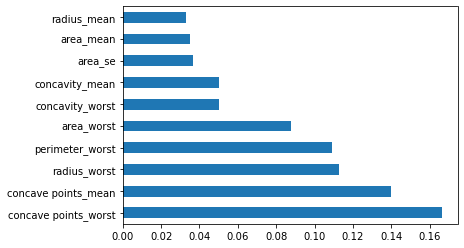

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestClassifier(max_depth=10, n_estimators=100,criterion='gini')


# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train_for_BC_nor,y_train_for_BC_nor)
prediction=RF.predict(X_test_for_BC_nor)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test_for_BC_nor, prediction))
print(metrics.confusion_matrix(y_test_for_BC_nor, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test_for_BC_nor, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X_BC , y_for_BC, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Refrencess: 

1. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

2. https://scikit-learn.org/stable/modules/svm.html

3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

4. https://surreylearn.surrey.ac.uk/d2l/le/lessons/209089/lessons/2080854

5. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

6. https://machinelearningmastery.com/imbalanced-classification-of-good-and-bad-credit/

7. https://surreylearn.surrey.ac.uk/d2l/le/lessons/209089/lessons/2091009

8. https://surreylearn.surrey.ac.uk/d2l/le/lessons/209089/lessons/2085599

9. https://thinkingneuron.com/german-credit-risk-classification-case-study-in-python/

10. https://machinelearningmastery.com/imbalanced-classification-of-good-and-bad-credit/
 
11. https://www.analyticsvidhya.com/blog/2020/10/how-to-choose-evaluation-metrics-for-classification-model/
12. https://www.ritchieng.com/machine-learning-evaluate-classification-model/



# Data preprocessing (Summary)

This section is a summary for the feautres selected from both dataset (A) & (B). After applied ANOVA test & Chi-square. 

<b> Dataset (A) features: </b>
1. Status of existing checking account
2. Credit history
3. Purpose
4. Credit amount
5. Savings account/bonds
6. Present employment since
7. Personal status and sex
8. Other debtors / guarantors
9. Property
10. Other installment plans
11. Housing
12. Foreign worker


<b> Dataset (B) features: </b>

1. radius_mean 
2. texture_mean 
3. perimeter_mean 
4. area_mean 
5. smoothness_mean 
6. compactness_mean 
7. concavity_mean 
8. concave points_mean
9. symmetry_mean
10. radius_se 
11. perimeter_se 
12. area_se 
13. compactness_se 
14. concavity_se 
15. concave points_se
16. radius_worst
17. texture_worst
18. perimeter_worst
19. area_worst
20. smoothness_worst 
21. compactness_worst 
22. concavity_worst 
23. concave points_worst
24. symmetry_worst 
25. fractal_dimension_worst 



# Models Accurices 


 <b> German Credit Dataset: </b>


- Support Vector Machine	73%	
- Random Forest	71%	
- Gaussian Naïve Bayes	69%	

<b> Breast Cancer Dataset: </b>

- Support Vector Machine	97%
- Random Forest	96%	
- Gaussian Naïve Bayes	93%




# End of Notebook 